# IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [3]:
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

# IMPORTING DATASET

In [4]:
dataset = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx' , index_col=0,  parse_dates= True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [6]:
dataset.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
dataset

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


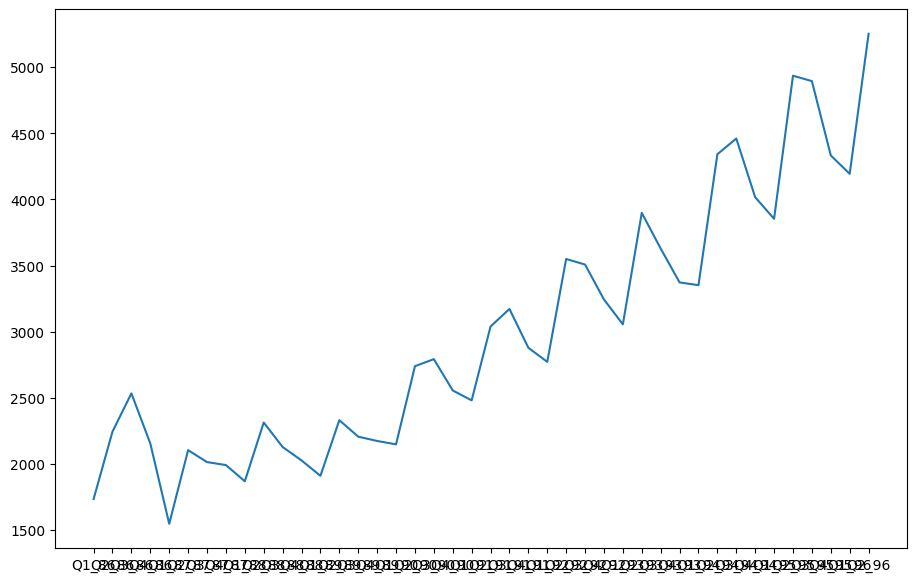

In [8]:
plt.figure(figsize = (11,7))
plt.plot(dataset)

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

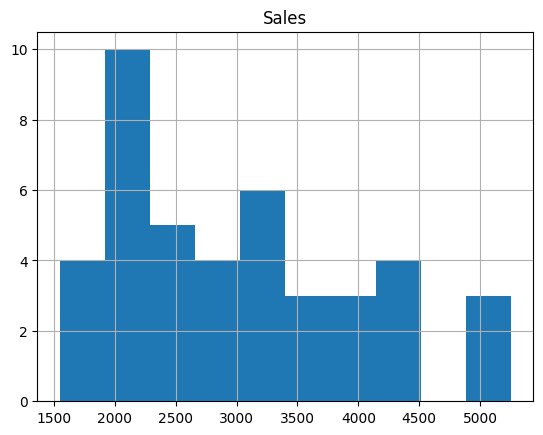

In [9]:
# create histogram plot
dataset.hist()

<Axes: ylabel='Density'>

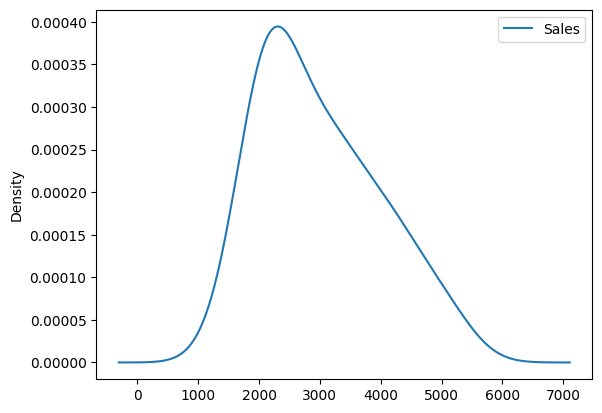

In [10]:
# create a density plot
dataset.plot(kind='kde')

# LAG PLOT


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

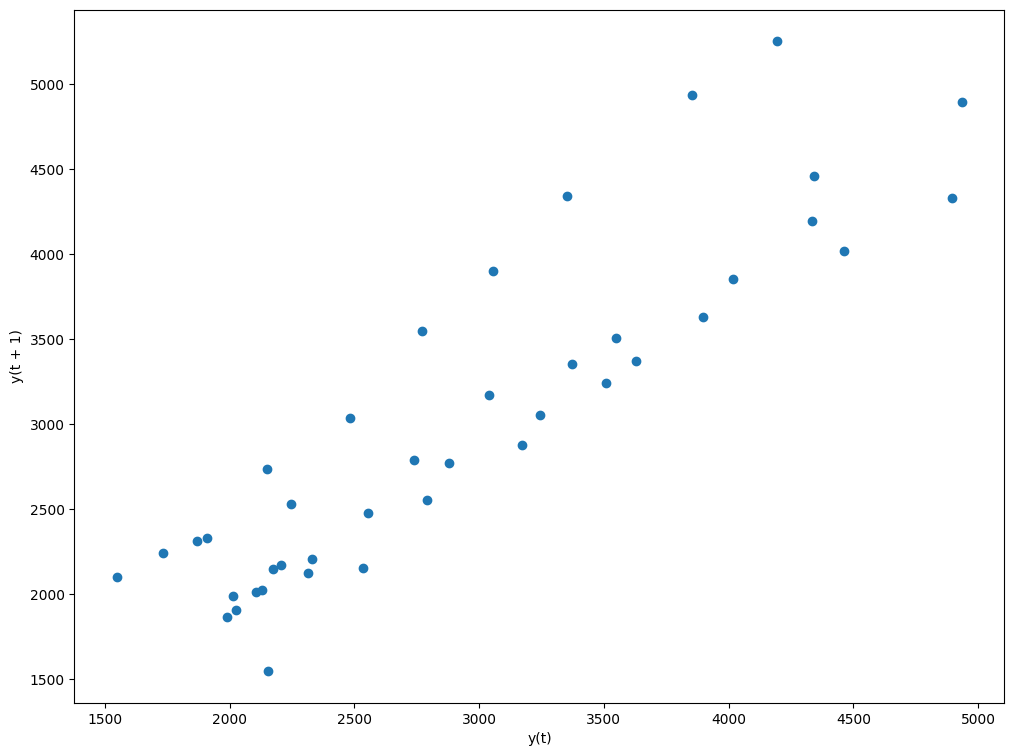

In [11]:
# create a scatter plot
plt.figure(figsize = (12,9))
pd.plotting.lag_plot(dataset)

In [12]:
dataset = pd.read_excel("CocaCola_Sales_Rawdata.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)
dataset

<ipython-input-12-190afaf16a30>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  dataset = pd.read_excel("CocaCola_Sales_Rawdata.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)


Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [13]:
type(dataset)

pandas.core.series.Series

In [14]:
# # box- plot 
# Sales = dataset.iloc[:, 0].values

In [15]:
# plt.figure(figsize = (15,7))
# Sales.boxplot()

<Figure size 4500x1800 with 0 Axes>

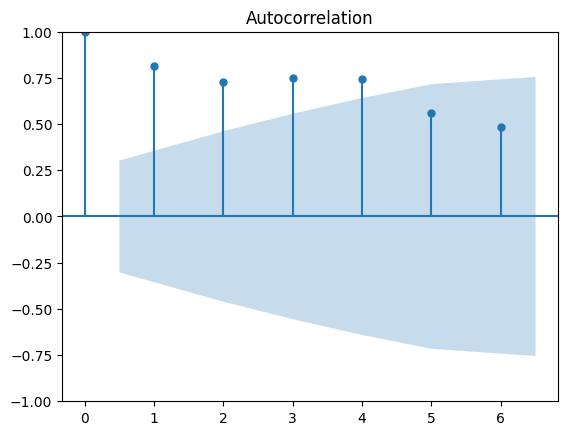

In [16]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (45,18))
plot_acf(dataset, lags=6)
plt.show()

# SAMPLING AND BASIC TRANSFORMATION

In [17]:
dataset = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)

<ipython-input-17-5dfa57e3f156>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  dataset = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)


In [18]:
dataset.shape

(42,)

In [19]:
dataset1 = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")

In [20]:
quar = ['Q1', 'Q2', 'Q3', 'Q4']

In [21]:
p = dataset1["Quarter"][0]
p[0:2]
dataset1['quar']= 0

for i in range(42):
    p = dataset1["Quarter"][i]
    dataset1['quar'][i]= p[0:2]
dataset1

<ipython-input-21-684f227451e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['quar'][i]= p[0:2]


,Quarter,Sales,quar
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [22]:
data= pd.get_dummies(dataset1['quar'])

In [23]:
data

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [24]:
dataset = pd.concat([dataset1, data],axis=1)
dataset

,Quarter,Sales,quar,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


# TRANSFORMATIONS

In [25]:
# load and plot a time series
data1 = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx",index_col=0,header=0, parse_dates=True)
data1

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


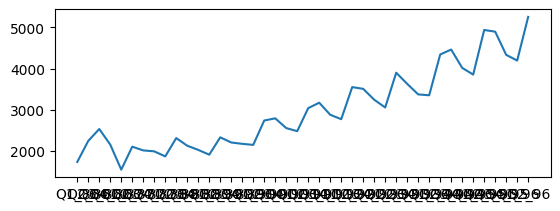

In [26]:
# line plot
plt.subplot(211)
plt.plot(data1)

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

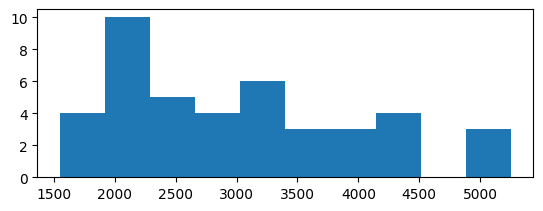

In [27]:
# histogram
plt.subplot(212)
plt.hist(data1)

In [28]:
# LOG TRANSFORMATION
dataframe = pd.DataFrame(np.log(data1.values), columns = ['Sales'])
dataframe

,Sales
0,7.458663
1,7.716443
2,7.837477
3,7.675529
4,7.344602
5,7.651791
6,7.608058
7,7.596767
8,7.533186
9,7.746574


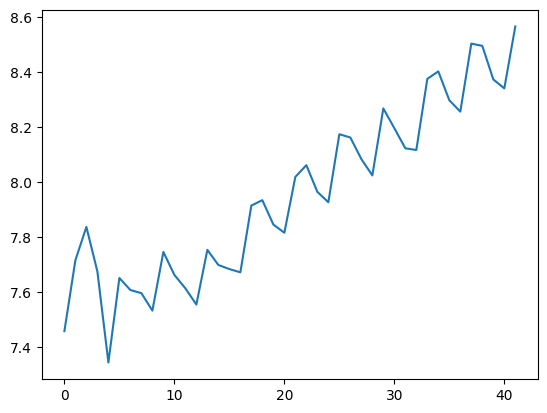

In [29]:
# line plot
plt.subplot(111)
plt.plot(dataframe['Sales'])

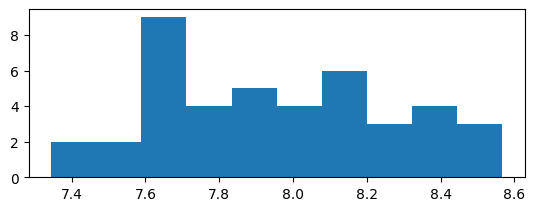

In [30]:
# histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

In [31]:
# quarterly_mean_sales.head()

In [32]:
# SQUARE ROOT TRANSFORMATION
dataframe = pd.DataFrame(np.sqrt(data1.values), columns = ['Sales'])
dataframe

,Sales
0,41.651254
1,47.381019
2,50.336915
3,46.421579
4,39.342331
5,45.873871
6,44.881655
7,44.628993
8,43.232511
9,48.100229


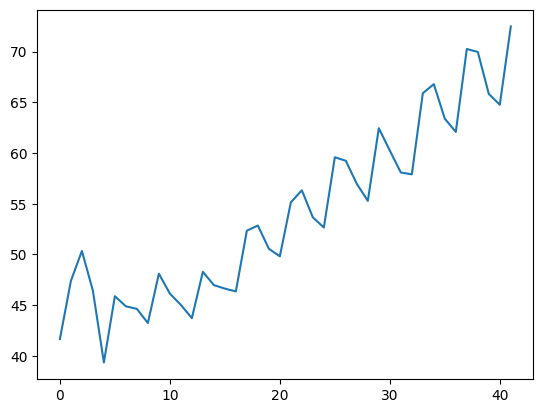

In [33]:
# line plot
plt.subplot(111)
plt.plot(dataframe['Sales'])

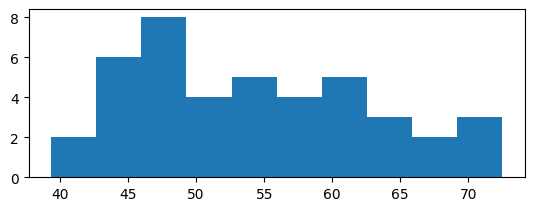

In [34]:
# histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

# FORECASTING - MODEL BASED METHODS

In [35]:
dataset=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
dataset

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<Axes: >

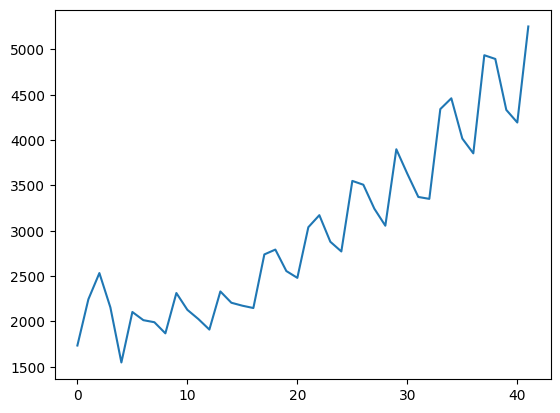

In [36]:
dataset['Sales'].plot()

In [37]:
dataset = pd.concat([dataset1, data],axis=1)

In [38]:
dataset

,Quarter,Sales,quar,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


<Axes: xlabel='quar', ylabel='Sales'>

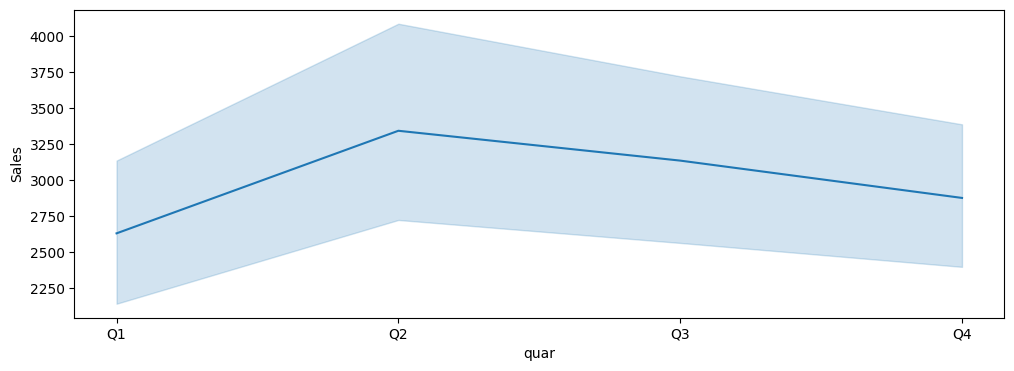

In [39]:
plt.figure(figsize=(12,4))
sns.lineplot(x="quar",y="Sales",data=dataset)

In [40]:
mp = pd.pivot_table(data = dataset, values = "Sales", index = "Quarter", columns = "quar", aggfunc = "mean", fill_value=0)
mp

quar,Q1,Q2,Q3,Q4
Quarter,,,,
Q1_86,1734.827000,0.000000,0.000000,0.000000
Q1_87,1547.818996,0.000000,0.000000,0.000000
Q1_88,1869.049999,0.000000,0.000000,0.000000
Q1_89,1910.603996,0.000000,0.000000,0.000000
Q1_90,2148.278000,0.000000,0.000000,0.000000
Q1_91,2480.973999,0.000000,0.000000,0.000000
Q1_92,2772.000000,0.000000,0.000000,0.000000
Q1_93,3056.000000,0.000000,0.000000,0.000000
Q1_94,3352.000000,0.000000,0.000000,0.000000


<Axes: xlabel='quar', ylabel='Quarter'>

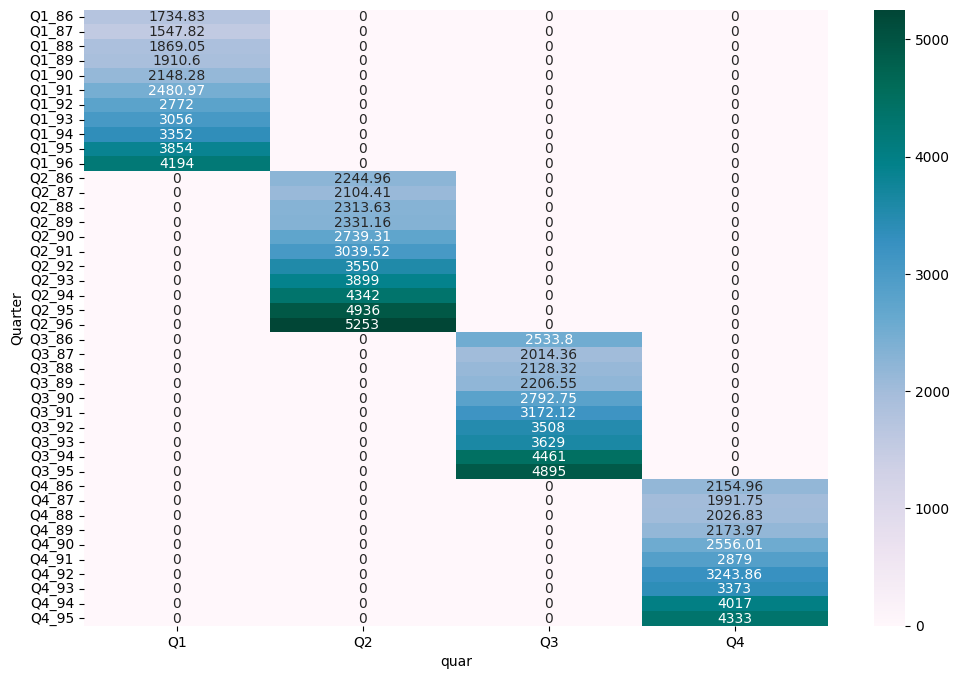

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(mp, annot=True, fmt="g", cmap = 'PuBuGn')

<Axes: xlabel='quar', ylabel='Sales'>

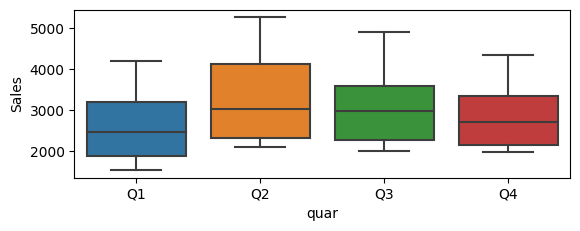

In [42]:
plt.subplot(211)
sns.boxplot(x = "quar",y = "Sales",data=dataset)

# SPLITTING THE DATASET

In [43]:
dataset

,Quarter,Sales,quar,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [44]:
dataset.shape

(42, 7)

In [45]:
# Complete the dataset
dataset['t']=np.arange(1,43)
dataset['t_square']=np.square(dataset.t)
dataset['log_Sales']=np.log(dataset.Sales)
dataset

,Quarter,Sales,quar,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [46]:
# For self understanding of forecasting values data split into multiples of 3
Train = dataset.head(30)
Test = dataset.tail(12)

In [47]:
Train

,Quarter,Sales,quar,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [48]:
Test

,Quarter,Sales,quar,Q1,Q2,Q3,Q4,t,t_square,log_Sales
30,Q3_93,3629.0,Q3,0,0,1,0,31,961,8.196712
31,Q4_93,3373.0,Q4,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015


In [49]:
#Linear Model
import statsmodels.formula.api as smf

In [50]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

714.0144483281299

In [51]:
#Exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

552.2821039079217

In [52]:
#Quadratic 
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

646.2715428311304

In [53]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467941367

In [54]:
# Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

586.0533067871008

In [55]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.9238912138117

In [56]:
# Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

410.24970596082767

In [57]:
# |Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4251.824804505767

In [58]:
df={"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(df)

In [59]:
table_rmse 

,MODEL,RMSE_Values
0,rmse_linear,714.014448
1,rmse_Exp,552.282104
2,rmse_Quad,646.271543
3,rmse_add_sea,1778.006547
4,rmse_add_sea_quad,586.053307
5,rmse_Mult_sea,1828.923891
6,rmse_Mult_add_sea,410.249706


In [60]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=dataset).fit()
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,410.249706
1,rmse_Exp,552.282104
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1828.923891


In [61]:
pred_new  = pd.Series(model_full.predict(dataset))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [62]:
dataset["Forecasted_Sales"] = pd.Series(np.exp(pred_new))

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


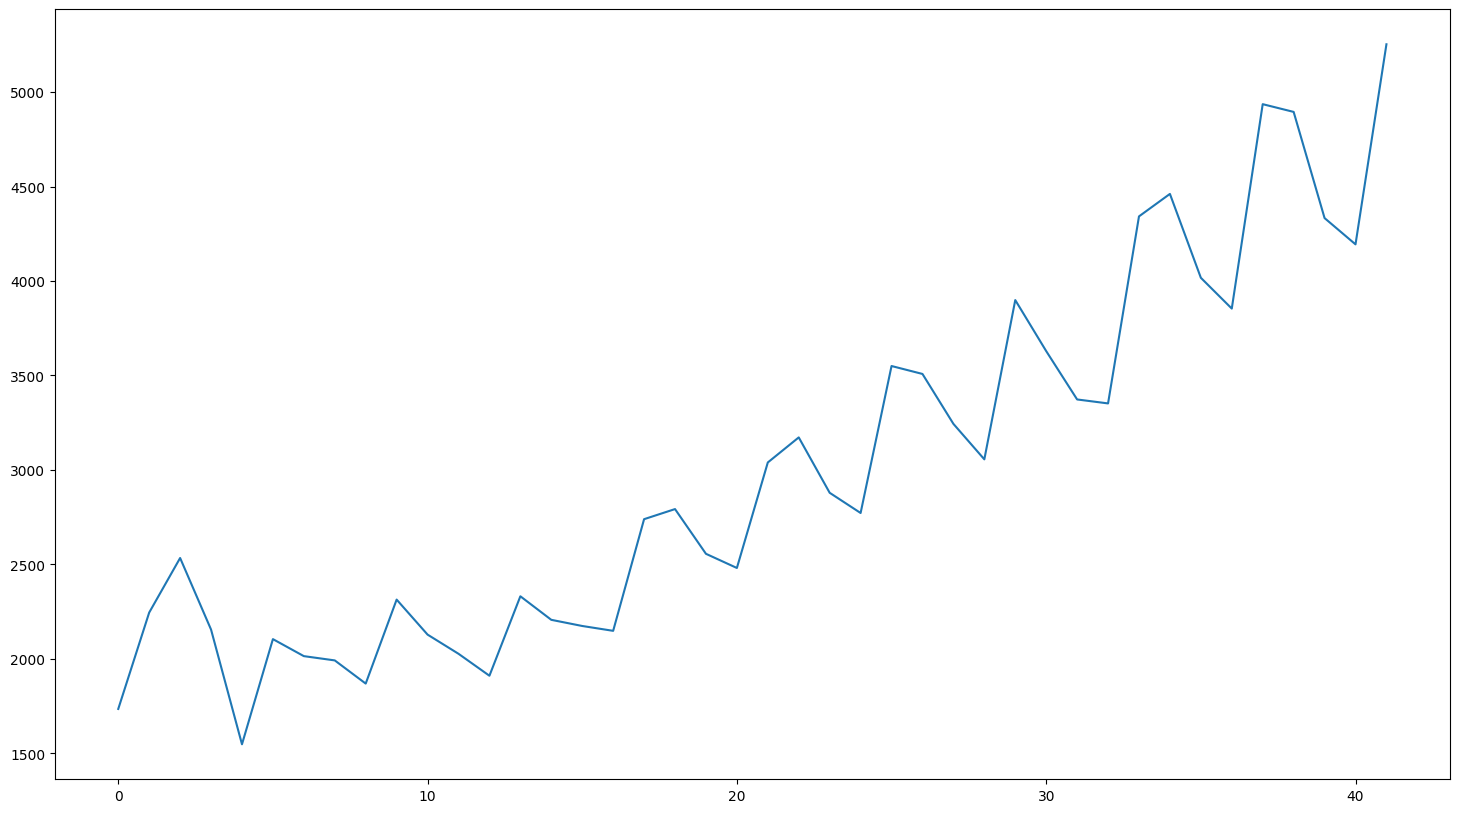

In [63]:
plt.figure(figsize=(18,10))
plt.plot(dataset[['Sales','Forecasted_Sales']].reset_index(drop=True))

# SPLITTING THE DATASET

In [64]:
cola = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
Train = cola.head(30)
Test = cola.tail(12)

In [65]:
Train

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [66]:
Test

,Quarter,Sales
30,Q3_93,3629.0
31,Q4_93,3373.0
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0


# MOVING AVERAGE 

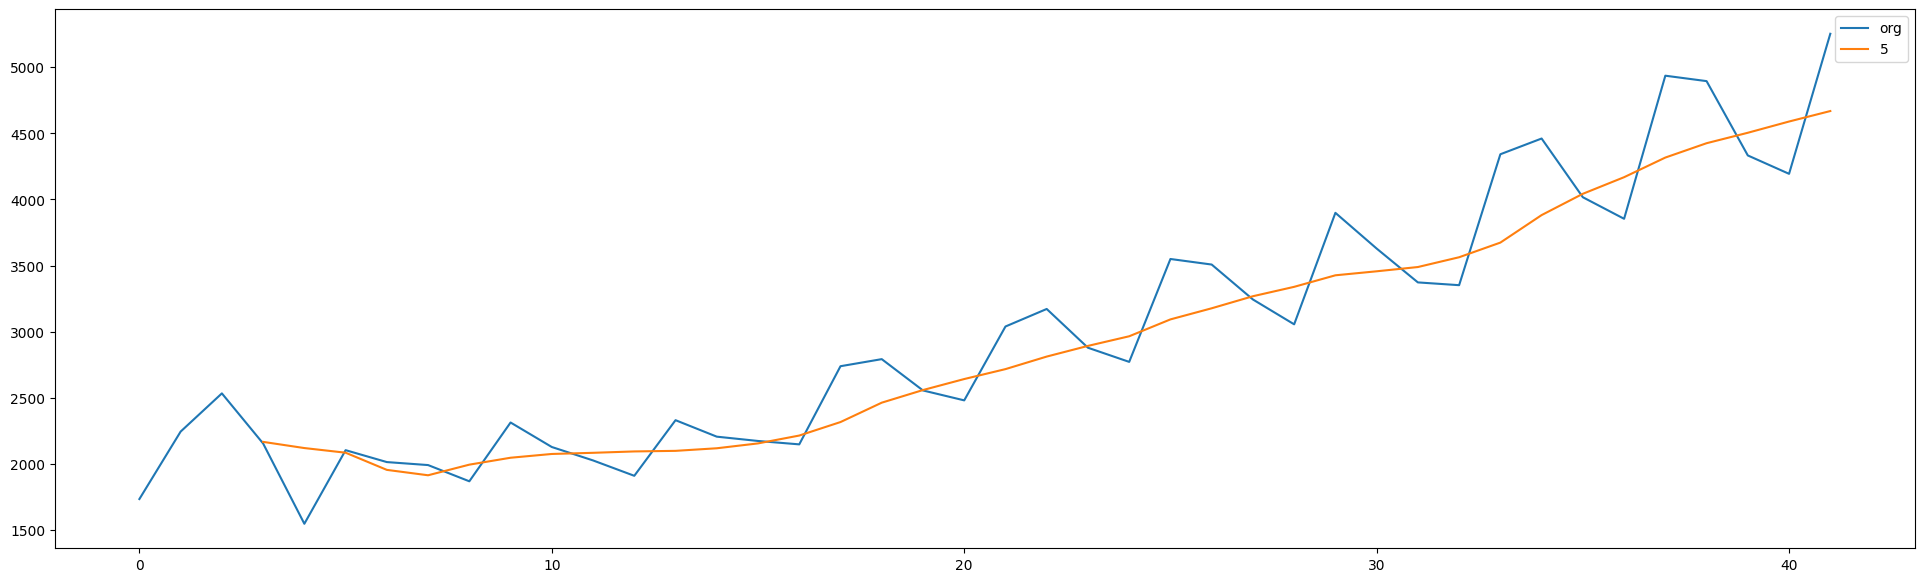

In [67]:
plt.figure(figsize=(24,7))
cola['Sales'].plot(label="org")
cola["Sales"].rolling(4).mean().plot(label=str(5))
plt.legend(loc='best')

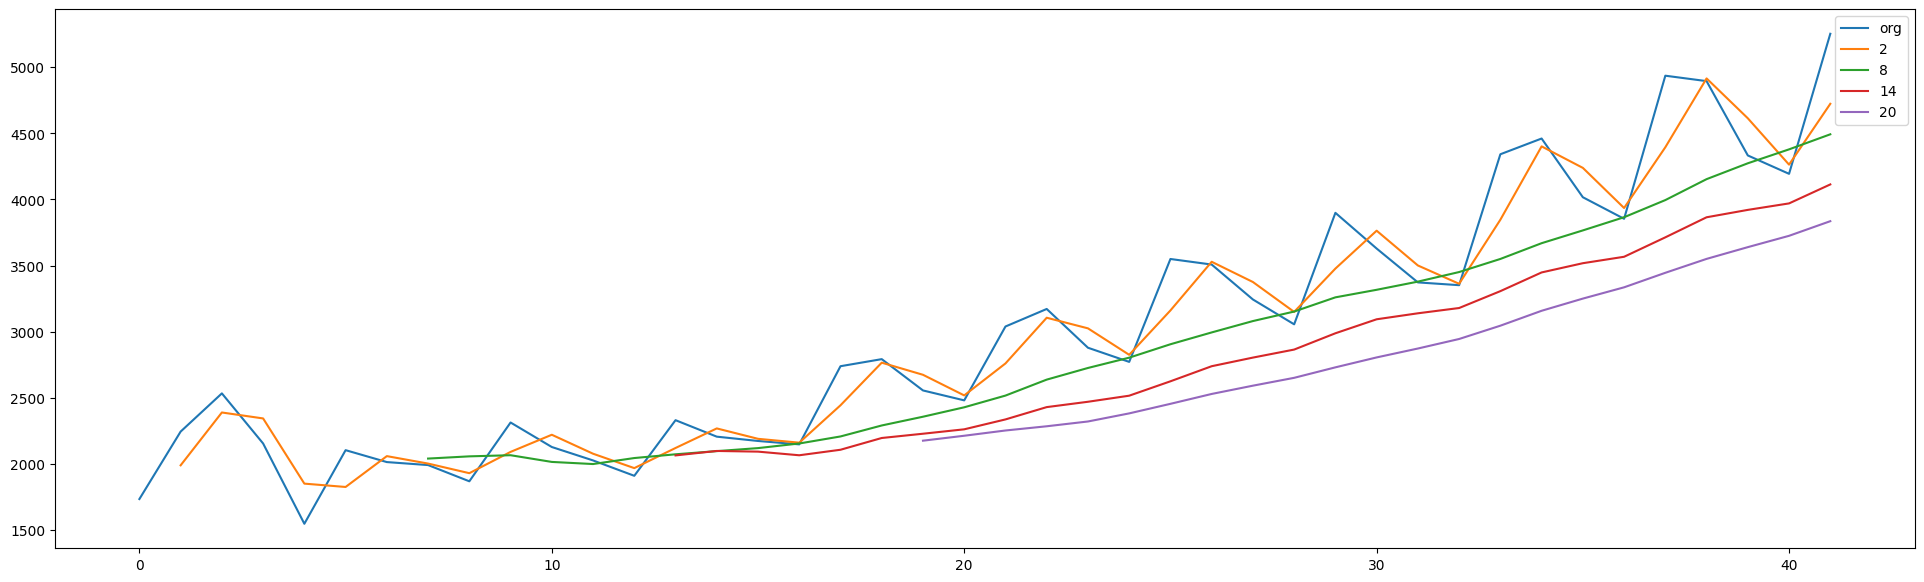

In [68]:
plt.figure(figsize=(24,7))
cola['Sales'].plot(label="org")
for i in range(2,24,6):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# TIME SERIES DECOMPOSITION PLOT

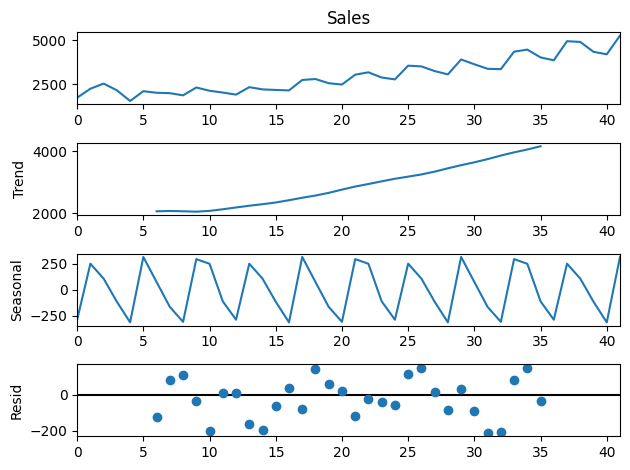

In [69]:
decompose_ts_add = seasonal_decompose(cola['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()

# ACF AND PACF PLOTS

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


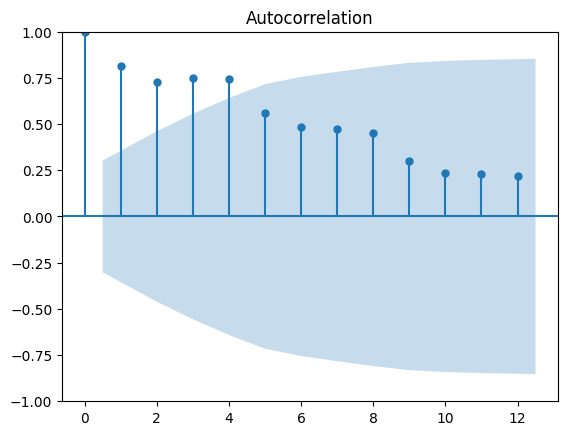

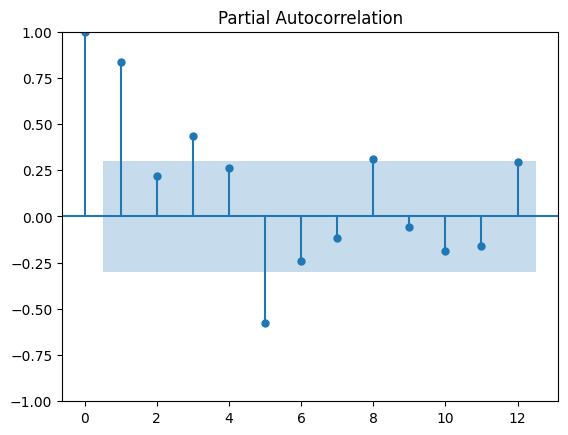

In [70]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_pacf(cola.Sales,lags=12)
plt.show()

# EVALUATION VALUE - METRIC

In [71]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [72]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

22.046763337847036

# HOLT METHOD

In [73]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

<ipython-input-73-baaa29c0f6b9>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


11.213841942210799

# HOLT WINTER EXPONENTIAL SMOOTHING WITH ADDITIVE SEASONALITY AND ADDITIVE TREND

In [74]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.537258097335431

# HOLT WINTER EXPONENTIAL SMOOTHING WITH MULTIPLICATIVE SEASONALITY AND ADDITIVE TREND

In [75]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

7.532113536522466

# FINAL MODEL BY COMBINING TRAIN AND TEST

In [76]:
hwe_model_mul_add = ExponentialSmoothing(cola["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [77]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

42    5012.147440
43    4645.260903
44    4490.053377
45    5638.551712
46    5671.720685
47    5107.131442
48    4834.680254
49    6127.684114
50    6109.530409
51    5503.868389
52    5100.552492
53    6447.534541
dtype: float64

# FORECASTING USING AUTO ARIMA MODEL

In [78]:
import statsmodels.tsa.seasonal
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
coca = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx",header=0, index_col=0, parse_dates=True)
coca

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


<Axes: >

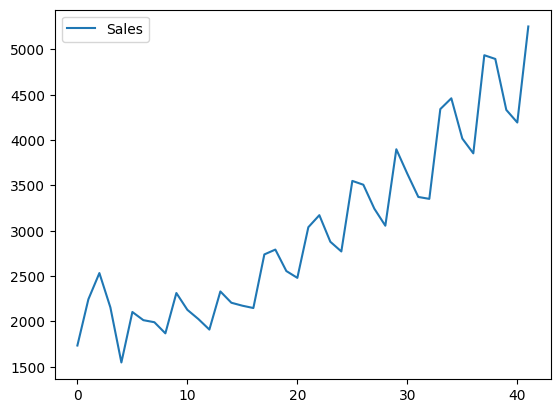

In [80]:
cola.plot()

In [81]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(coca)

(0.06309659985640072, True)

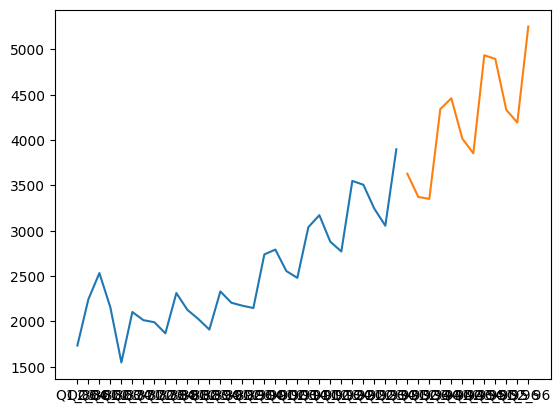

In [82]:
train = coca[:30]
test = coca[-12:]
plt.plot(train)
plt.plot(test)

In [83]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn',trace=True, suppress_warnings=True,stepwise=True, random_state=20,n_fits=50)
                         

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=239.106, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=241.018, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=241.104, Time=0.18 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=239.047, Time=0.08 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=239.168, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=240.985, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=239.389, Time=0.19 sec

Best model:  ARIMA(0,1,0)(1,1,0)[12]          
Total fit time: 3.063 seconds


In [84]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   30
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -117.523
Date:                            Fri, 07 Apr 2023   AIC                            239.047
Time:                                    23:54:48   BIC                            240.713
Sample:                                         0   HQIC                           239.212
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4559      0.735     -0.620      0.535      -1.896       0.985
sigma2      5.191e+04   5.01e+04      1.035      0.300   -4.64e+04     1.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.91   Prob(JB):                         0.90
Heteroskedasticity (H):               0.40   Skew:                             0.09
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 12),index=test.index)
prediction.columns = ['predicted_pass']
prediction

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_pass
Quarter,
Q3_93,NaN
Q4_93,NaN
Q1_94,NaN
Q2_94,NaN
Q3_94,NaN
Q4_94,NaN
Q1_95,NaN
Q2_95,NaN
Q3_95,NaN


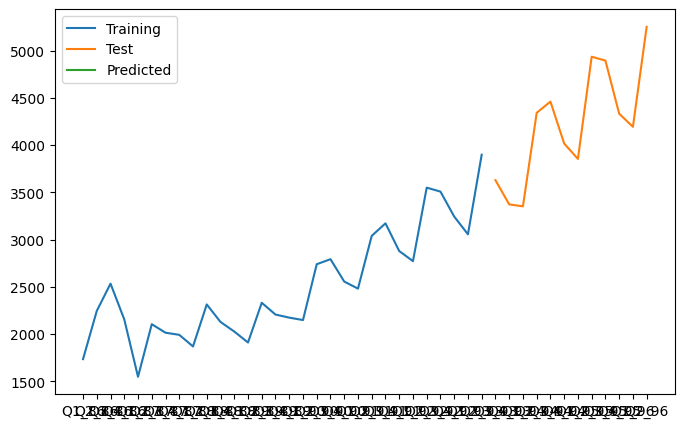

In [86]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper left')
plt.show()

# PRESISTENCE/ BASE MODEL

In [87]:
# separate out a validation dataset
split_point = len(coca) - 10
dataset, validation = coca[0:split_point], coca[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 32, Validation 10


In [88]:
# evaluate a persistence model and load data
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

<ipython-input-88-a0805dabf823>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float64

In [89]:
# prepare data
X = train
X

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float64

In [90]:
X = X.astype('float32')
X

0
Q1_86    1734.827026
Q2_86    2244.960938
Q3_86    2533.804932
Q4_86    2154.962891
Q1_87    1547.818970
Q2_87    2104.412109
Q3_87    2014.363037
Q4_87    1991.746948
Q1_88    1869.050049
Q2_88    2313.632080
Q3_88    2128.320068
Q4_88    2026.828979
Q1_89    1910.604004
Q2_89    2331.165039
Q3_89    2206.550049
Q4_89    2173.968018
Q1_90    2148.278076
Q2_90    2739.308105
Q3_90    2792.753906
Q4_90    2556.010010
Q1_91    2480.973877
Q2_91    3039.522949
Q3_91    3172.115967
Q4_91    2879.000977
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.860107
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float32

In [91]:
train_size = int(len(X) * 0.50)
train_size

16

In [92]:
train, test = X[0:train_size], X[train_size:]

In [93]:
train

0
Q1_86    1734.827026
Q2_86    2244.960938
Q3_86    2533.804932
Q4_86    2154.962891
Q1_87    1547.818970
Q2_87    2104.412109
Q3_87    2014.363037
Q4_87    1991.746948
Q1_88    1869.050049
Q2_88    2313.632080
Q3_88    2128.320068
Q4_88    2026.828979
Q1_89    1910.604004
Q2_89    2331.165039
Q3_89    2206.550049
Q4_89    2173.968018
Name: 1, dtype: float32

In [94]:
test

0
Q1_90    2148.278076
Q2_90    2739.308105
Q3_90    2792.753906
Q4_90    2556.010010
Q1_91    2480.973877
Q2_91    3039.522949
Q3_91    3172.115967
Q4_91    2879.000977
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.860107
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float32

In [95]:
# walk-forward validation
history = [x for x in train]
import warnings
history

[1734.8270263671875,
 2244.9609375,
 2533.804931640625,
 2154.962890625,
 1547.8189697265625,
 2104.412109375,
 2014.363037109375,
 1991.7469482421875,
 1869.050048828125,
 2313.632080078125,
 2128.320068359375,
 2026.8289794921875,
 1910.60400390625,
 2331.1650390625,
 2206.550048828125,
 2173.968017578125]

In [96]:
# Predictions
predictions = list()

In [97]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000


In [98]:
# report performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 387.510


# BUILDING MODEL USING OPTIMISED VALUES

In [99]:
# save finalized model to file and load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,1734.8269996643066
Q1_86,
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999
Q2_88,2313.631996


In [100]:
# prepare data
X = train
X = X.astype('float32')

In [101]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

31    3209.331605
32    3920.333267
33    3556.342532
34    3371.974422
35    3305.226874
36    3891.175702
37    3491.080974
38    3386.317541
39    3382.323718
40    3851.697954
41    3442.357722
42    3410.137872
Name: predicted_mean, dtype: float64

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


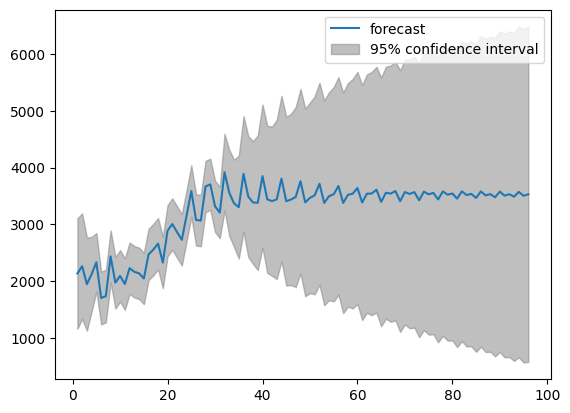

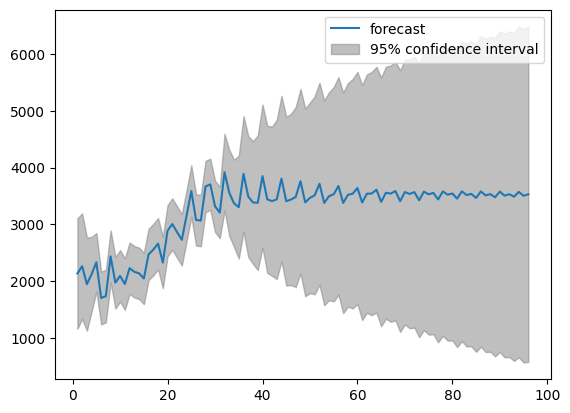

In [102]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

In [103]:
# Combine train and test data and build final model 
# fit model
data = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx",header=0, index_col=0, parse_dates=True)

In [104]:
# prepare data
X = train
X = X.astype('float32')

In [105]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

In [106]:
forecast=model_fit.forecast(steps=12)
forecast

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


31    3209.331605
32    3920.333267
33    3556.342532
34    3371.974422
35    3305.226874
36    3891.175702
37    3491.080974
38    3386.317541
39    3382.323718
40    3851.697954
41    3442.357722
42    3410.137872
Name: predicted_mean, dtype: float64

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


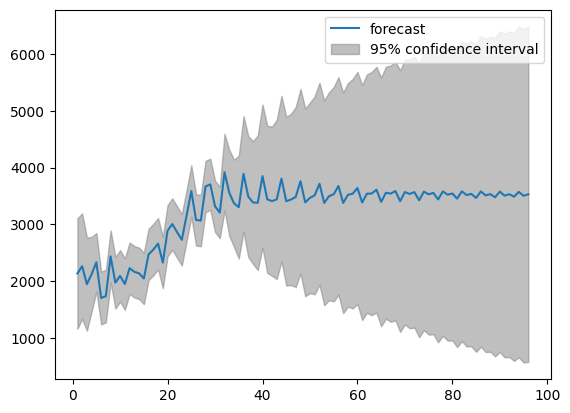

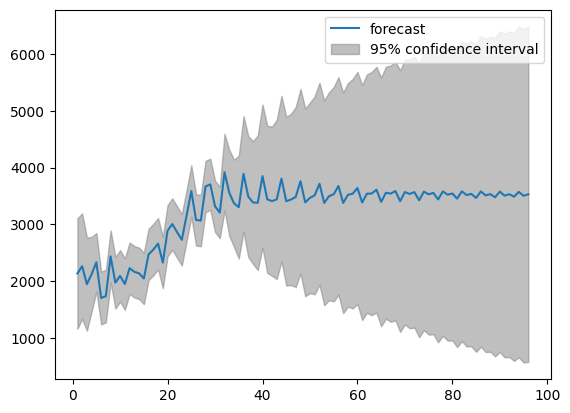

In [107]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)